In [1]:
from AutoPlot import *

#### 数据初始化

In [2]:
df = pd.read_csv(r'E:\02code\01_EasyPlot\sample.csv')
feature_num = ['feature_3', 'feature_15', 'feature_26', 'feature_11',
   'feature_12', 'feature_194', 'feature_18', 'feature_210', 'feature_22',
   'feature_5', 'feature_270', 'feature_6', 'feature_267', 'feature_204',
   'feature_7', 'feature_281', 'feature_24', 'feature_23', 'feature_193',
   'feature_213', 'feature_191', 'feature_230', 'feature_250',
   'feature_297', 'feature_299', 'feature_90', 'feature_8', 'feature_188',
   'feature_343', 'feature_352', 'feature_25']
feature_clf = ['feature_347', 'feature_298', 'feature_294']
label_name = 'price'

#### AutoPlot实例化

In [3]:
### 实例化绘图类
save_path = r'./{}_{}.{}' # {}固定图片保存格式
autoPlot = AutoPlot(save_path=save_path)

#### 数值变量分析

#####  单个数值变量自身布

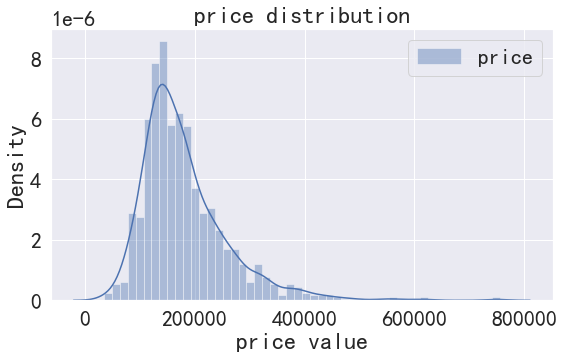

In [5]:
# 核密度图
fig, axe = plt.subplots(1,1,figsize=(9,5))
autoPlot.num_dist_plot(df, num_name='price', ax_kde=axe)

In [ ]:
# 保存图片，对fig传入画布
autoPlot.num_dist_plot(df, num_name='price', ax_kde=axe, fig=fig)

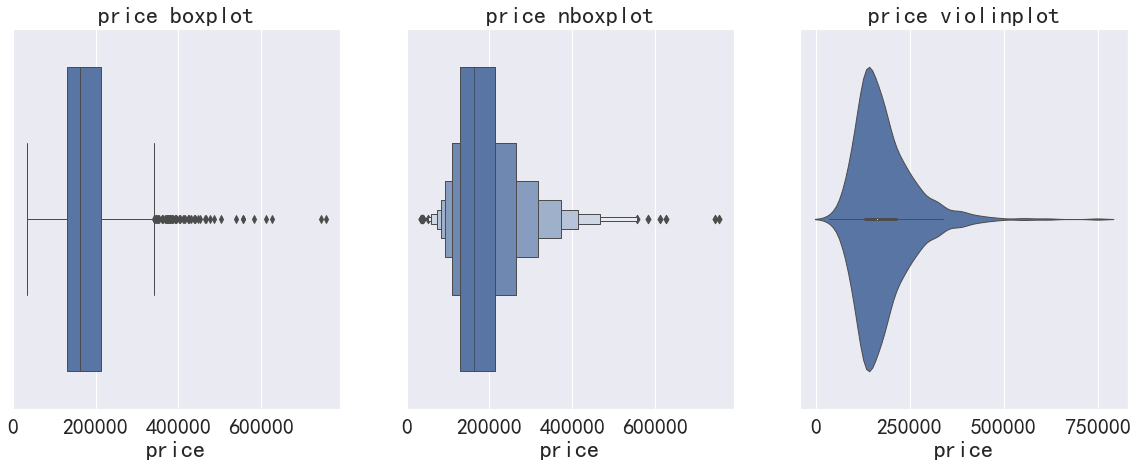

In [6]:
# 其他可视化形式，指定对应的axe
fig, axe = plt.subplots(1,3,figsize=(20,7))
# plt.subplots_adjust(wspace=0.3) # 调整子图
autoPlot.num_dist_plot(df, num_name='price', ax_box=axe[0])
autoPlot.num_dist_plot(df, num_name='price', ax_nbox=axe[1])
autoPlot.num_dist_plot(df, num_name='price', ax_vln=axe[2])

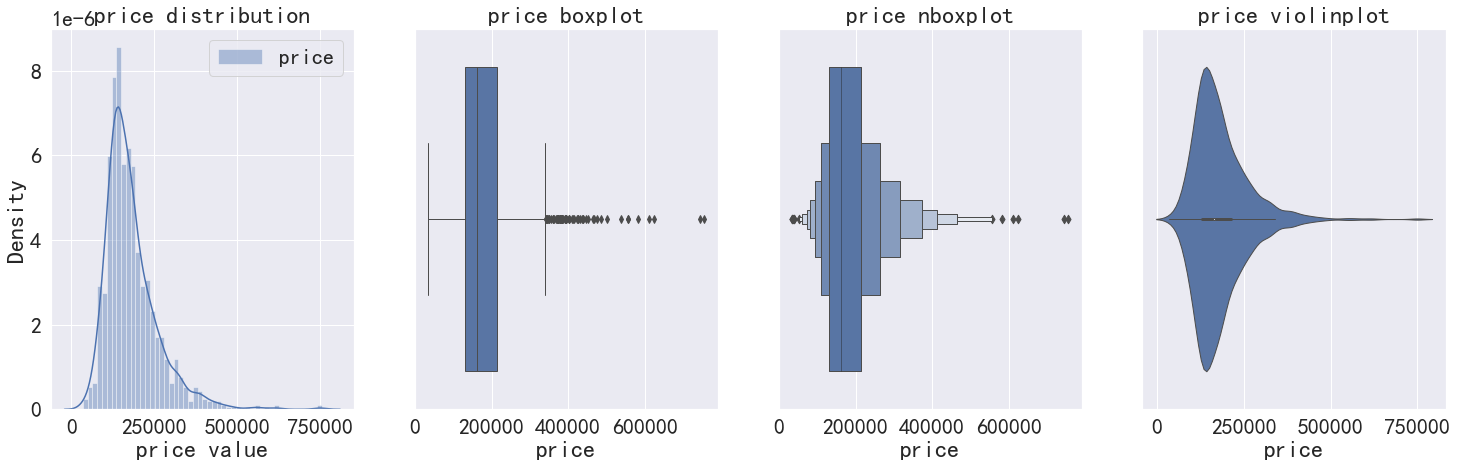

In [17]:
# 其他可视化形式，指定对应的axe
fig, axe = plt.subplots(1,4,figsize=(25,7))
# plt.subplots_adjust(wspace=0.3) # 调整子图
autoPlot.num_dist_plot(df, num_name='price', ax_kde=axe[0])
autoPlot.num_dist_plot(df, num_name='price', ax_box=axe[1])
autoPlot.num_dist_plot(df, num_name='price', ax_nbox=axe[2])
autoPlot.num_dist_plot(df, num_name='price', ax_vln=axe[3])

##### 单个数值变量分类变量（序列）下的分布

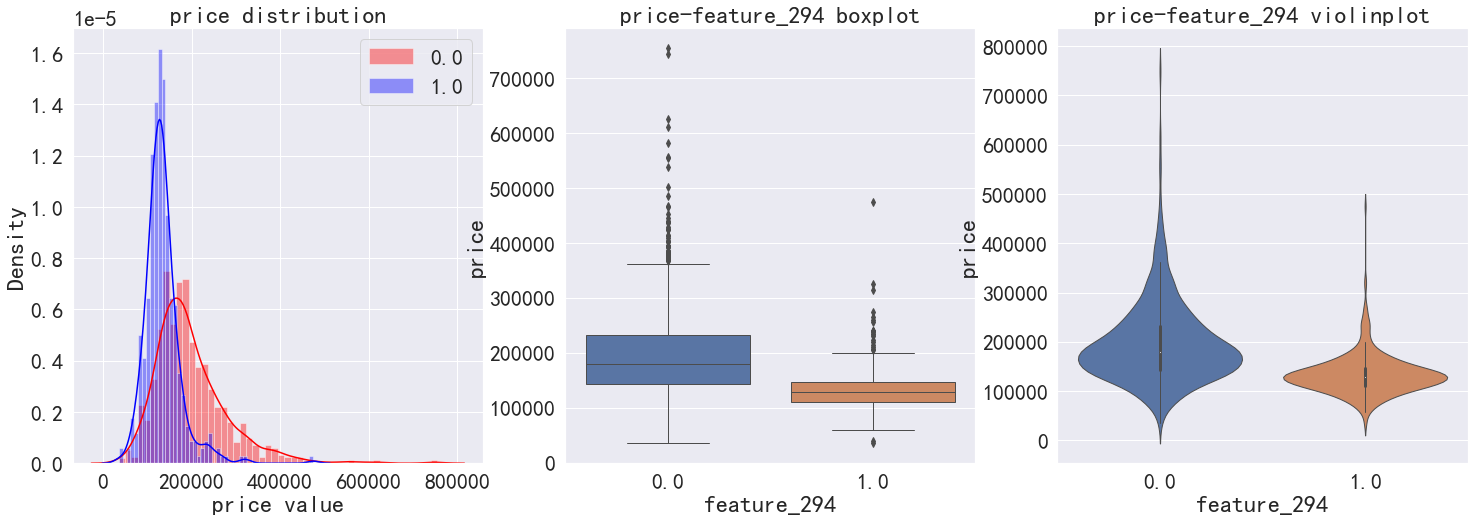

In [13]:
# 分类变量下的分布
fig, axe = plt.subplots(1,3,figsize=(25,8))
autoPlot.num_seq_plot(df, num_name='price', seq_name='feature_294', ax_kde=axe[0])
autoPlot.num_seq_plot(df, num_name='price', seq_name='feature_294', ax_box=axe[1])
autoPlot.num_seq_plot(df, num_name='price', seq_name='feature_294', ax_vln=axe[2])

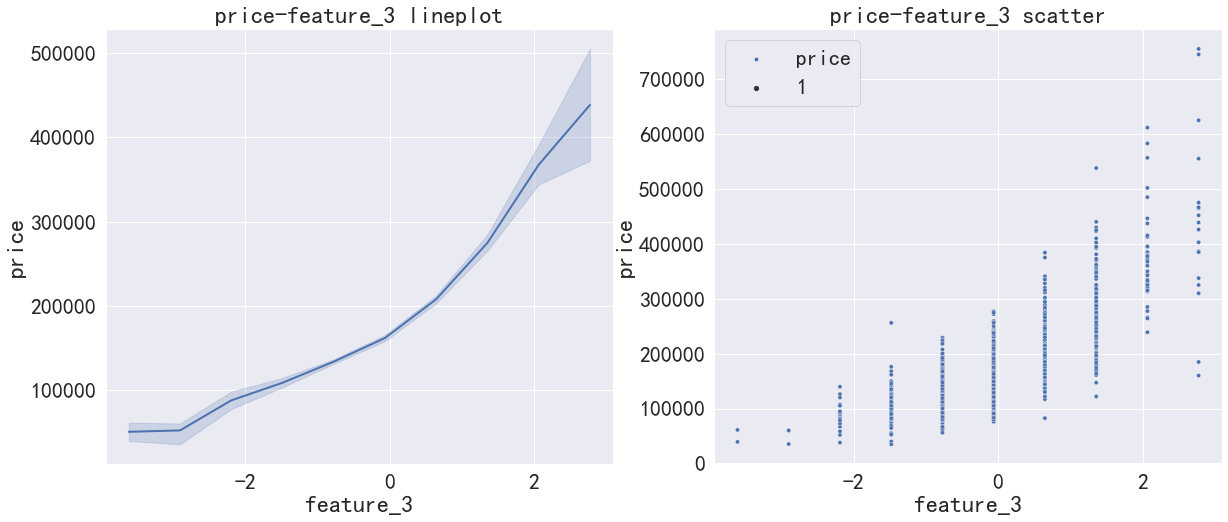

In [15]:
# 序列变量下的分布 散点 or 折线，适用于时序可视化
fig, axe = plt.subplots(1,2,figsize=(20,8))
autoPlot.num_seq_plot(df, num_name='price', seq_name='feature_3', ax_line=axe[0]) # 折线
autoPlot.num_seq_plot(df, num_name='price', seq_name='feature_3', ax_sca=axe[1])  # 散点 

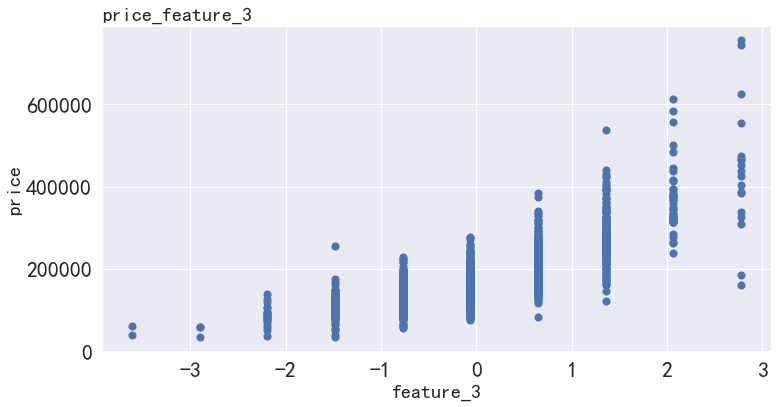

In [21]:
# 其他更灵活的散点图，可调整点大小和字体大小
fig, axe = plt.subplots(1,1,figsize=(12,6))
autoPlot.scatter_plot(df, y_name='price', x_name='feature_3', axe=axe,
                     point_size=50, font_size=20)

##### 多个数值变量pairt_plot 相关性热力图

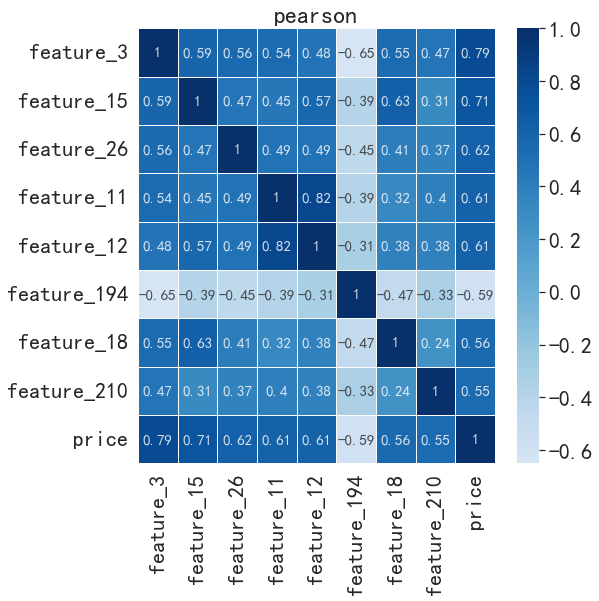

In [29]:
fig, axe = plt.subplots(1,1,figsize=(8,8))
cols_num = feature_num[:8] + ['price'] # 指定数值变量列名
autoPlot.num_num_plot(df[cols_num], ax_hotmap=axe)

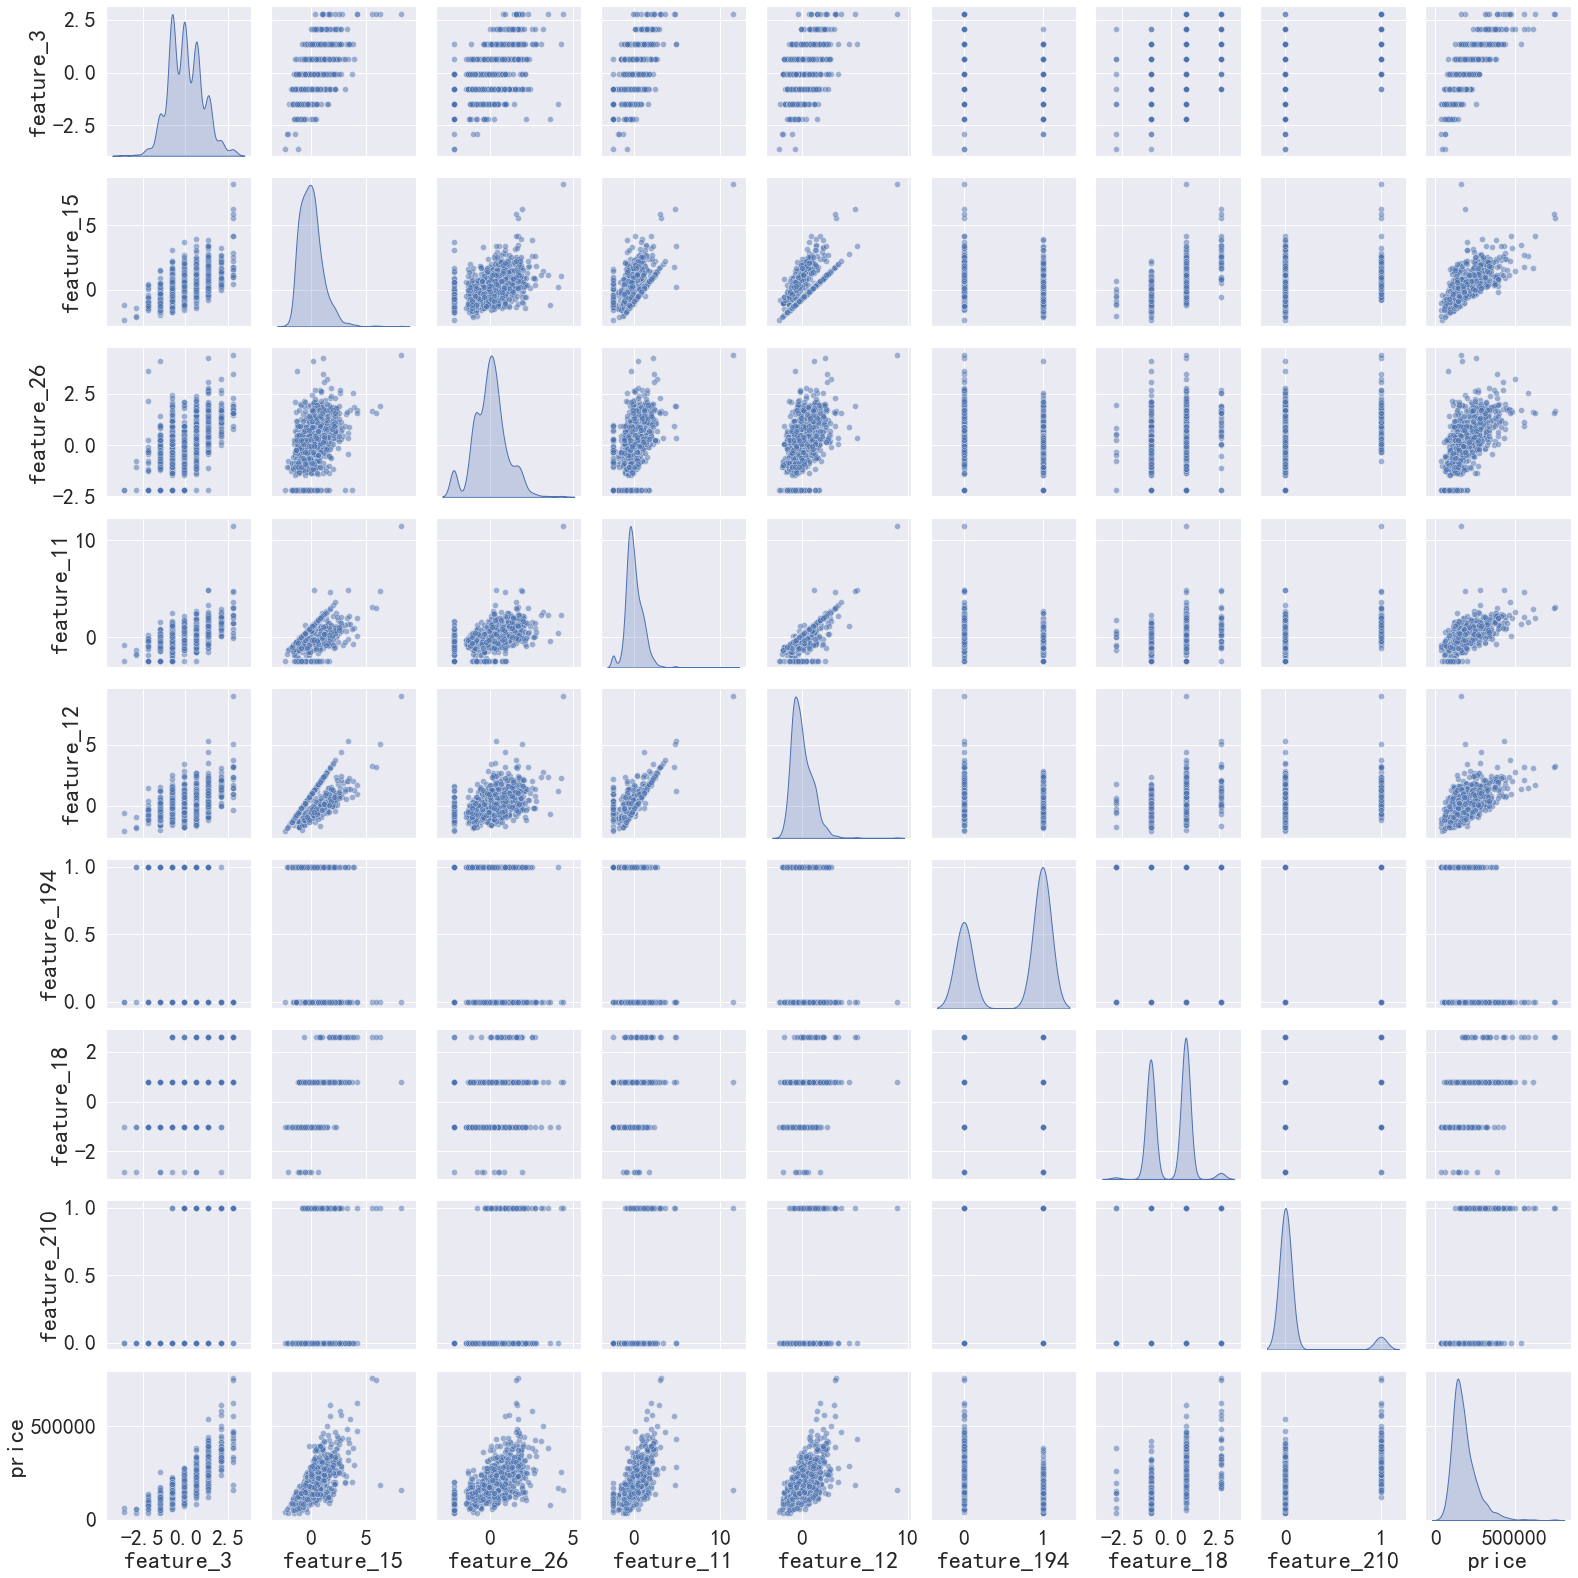

In [31]:
# pairt_plot两两组合
cols_num = feature_num[:8] + ['price'] # 指定数值变量列名
autoPlot.num_num_plot(df[cols_num], ax_pairplot=True) 
"""
可以进一步根据kind、diag_kind分别制定非对角和对角的出图类型
对hue参数指定一个分类变量可以按类别查看相关分布关系
"""

##### 两个数值变量2d密度图

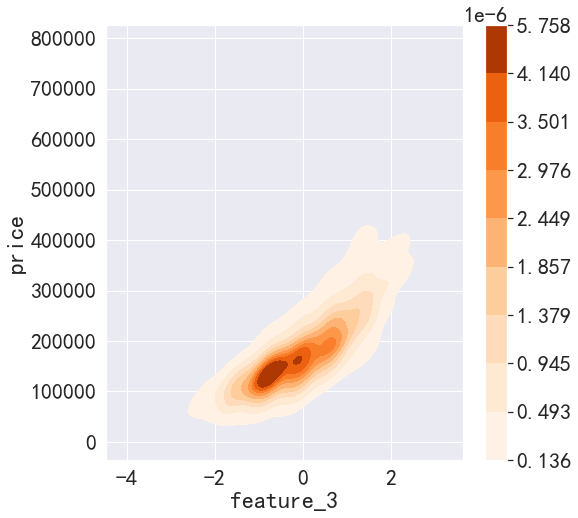

In [33]:
fig, axe = plt.subplots(1,1,figsize=(8,8))
autoPlot.num_num_2d_dist(df,num_name0='feature_3', num_name1='price',axe=axe) 

##### 两组数值变量qq图

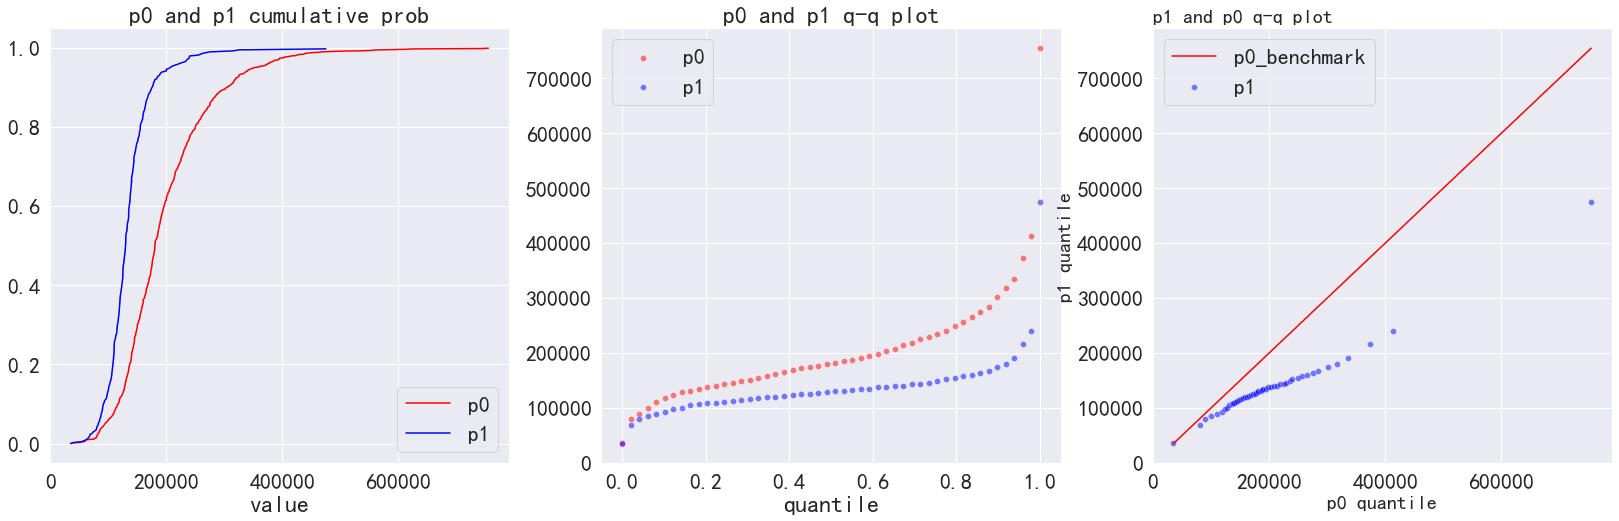

In [38]:
# 进一步比较两组数值数据分布关系 累计密度图 分位数对比图
# 准备两组数据
data0 = df.loc[df['feature_294']==0, 'price']
data1 = df.loc[df['feature_294']==1, 'price']
# 绘图
fig, axe = plt.subplots(1,3,figsize=(28,8))
autoPlot.qq_plot(data0,data1,label0='p0', label1='p1', ax_cuml=axe[0]) # 累计密度
autoPlot.qq_plot(data0,data1,label0='p0', label1='p1', ax_qq=axe[1]) # x轴为分位百分数 
autoPlot.qq_plot(data0,data1,label0='p0', label1='p1', ax_qq_ref=axe[2]) # x轴为data0多分位数

In [ ]:
"""
分析结果累计密度查看两者分布类型相似,
观察qqplot p0相对p1右偏，在分布末端差异很大
"""

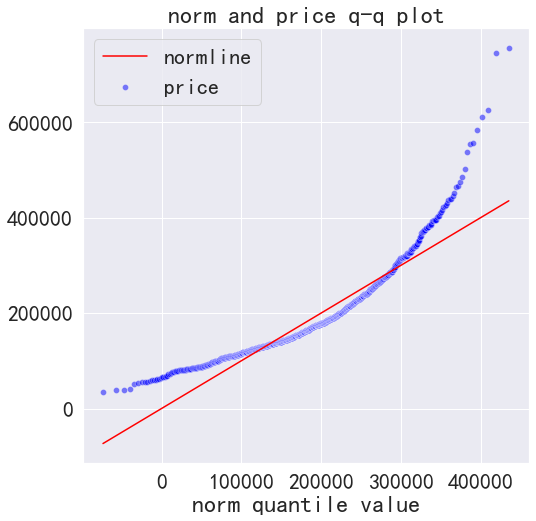

In [6]:
# 比较给定数据与标准分布的差异
fig, axe = plt.subplots(1,1,figsize=(8,8))
loc = df['price'].mean()
scale = df['price'].std()
prams = {'loc':loc, 'scale':scale}
autoPlot.qq_plot_standar(data=df['price'], label='price', ax_qq_standar=axe, 
                         standar_dist='norm',**prams)

#### 类别变量分析

##### 单个类别变量分布统计

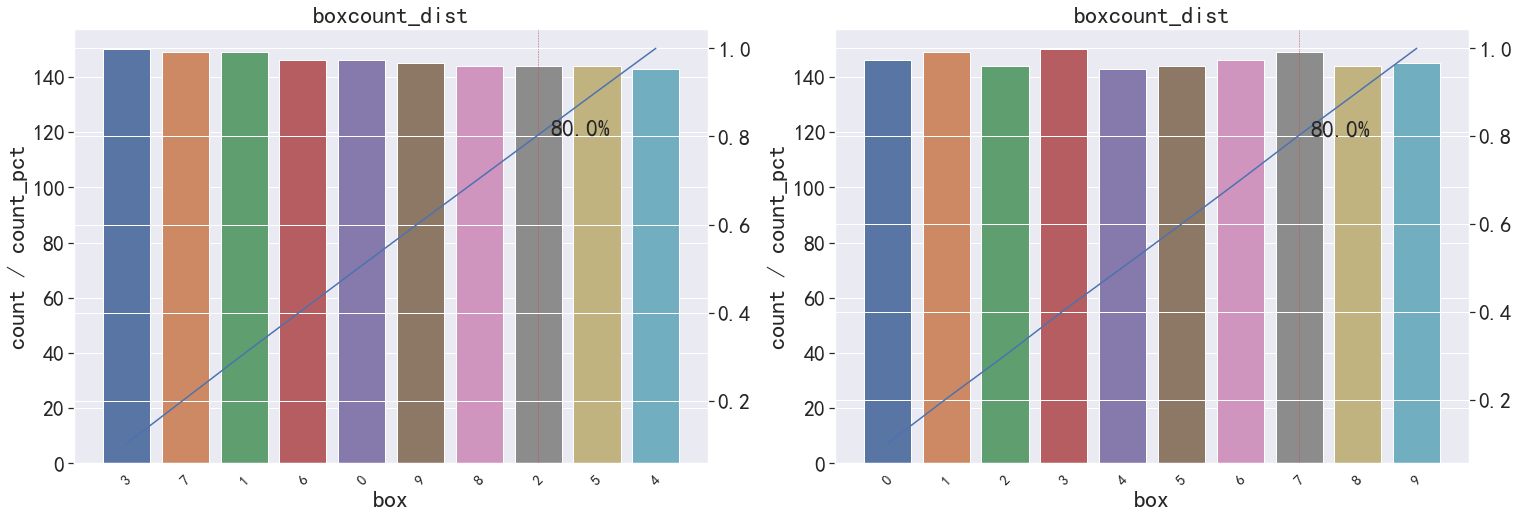

In [5]:
df['box'] = pd.qcut(df['price'], q=10, labels=False) # 获得分类数据
fig, axe = plt.subplots(1,2,figsize=(25,8))
autoPlot.cat_dist_plot(df, cat_name='box', axe=axe[0]) # 默认按计数降序
autoPlot.cat_dist_plot(df, cat_name='box', axe=axe[1],sort_val=False) # 否则按标签数值排序

##### 两个分类变量交叉统计

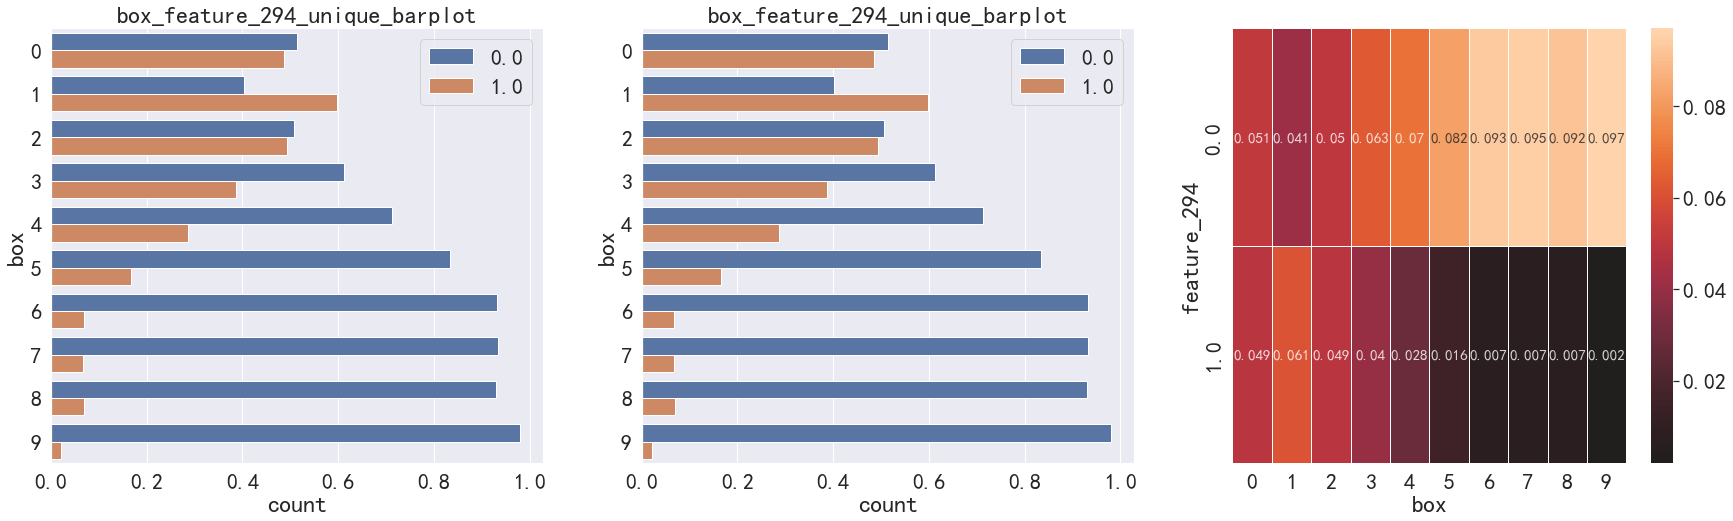

In [8]:
fig, axe = plt.subplots(1,3,figsize=(30,8))
autoPlot.cat_cat_plot(df, cat_name0='feature_294', cat_name1='box',axe_bar=axe[0])
# 设置normalize=True：一个box下两个柱子相加为1
autoPlot.cat_cat_plot(df, cat_name0='feature_294', cat_name1='box',axe_bar=axe[1],normalize=True) 
autoPlot.cat_cat_plot(df, cat_name0='feature_294', cat_name1='box',axe_hot=axe[2])

#### 其他可视化

##### 一个类别对多个数值变量的区分,类别变量必须是二分类

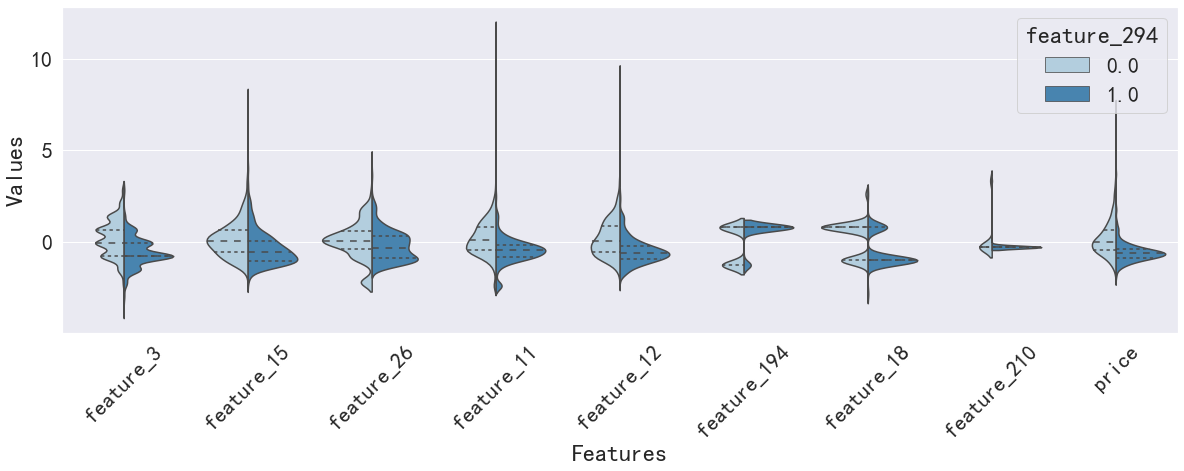

In [9]:
# 小提琴左右分布对比
fig, axe = plt.subplots(1,1,figsize=(20,6))
cols_num = feature_num[:8] + ['price'] # 指定数值变量列名
autoPlot.violine_cat_dist(df, cat_name='feature_294', num_name_ls=cols_num, axe=axe)

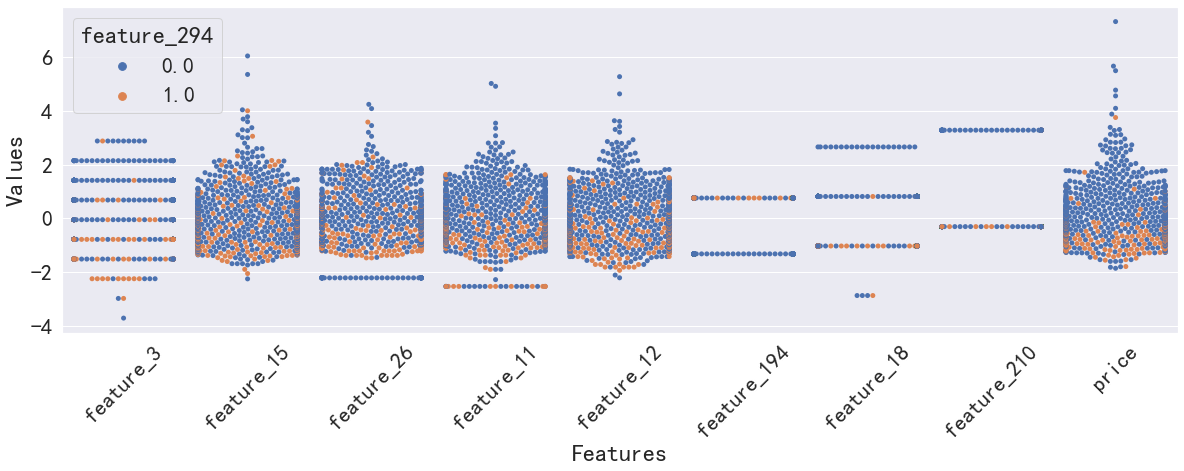

In [11]:
# 散点分布对比
fig, axe = plt.subplots(1,1,figsize=(20,6))
cols_num = feature_num[:8] + ['price'] # 指定数值变量列名
autoPlot.swarm_cat_plot(df, cat_name='feature_294', num_name_ls=cols_num, axe=axe)